<a href="https://colab.research.google.com/github/Louismada29/Credits_Default/blob/main/Credit(Loans)_Default_ClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

## Read Data

In [167]:
data = pd.read_csv('https://raw.githubusercontent.com/Louismada29/Credits_Default/main/credit_default_dataset.csv')
data.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0


In [168]:
# melihat informasi dalam data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   3693 non-null   int64  
 1   customer_bod  3693 non-null   object 
 2   gender        3385 non-null   object 
 3   phone_flag    3693 non-null   float64
 4   student       3693 non-null   object 
 5   employment    2701 non-null   object 
 6   credit_card   3682 non-null   float64
 7   balance       3693 non-null   float64
 8   income        3693 non-null   float64
 9   tenure        3693 non-null   object 
 10  default       3693 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 317.5+ KB


In [169]:
# data shape
data.shape

(3693, 11)

# Exploratory Data Analysis

## Dependent Variable

In [170]:
# Dependent Variable
y = data['default']
y_no = y[y=='0']
y_yes = y[y=='1']

# Independent Variable
X = data.drop('default', axis = 1)
x_no = data[data['default']=='No'].drop(['customer_id', 'default'], axis = 1)
x_yes = data[data['default']=='Yes'].drop(['customer_id', 'default'], axis = 1)

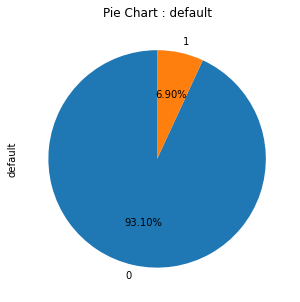

In [171]:
default = y.value_counts()
default.plot.pie(figsize=(5,5), autopct='%1.2F%%', startangle=90)

plt.title('Pie Chart : default')
plt.show() 

''' Terlihat data yang tidak seimbang antara kategori 1 dengan kategori 0'''
print()

## Independent Variables

### Distribution of Gender

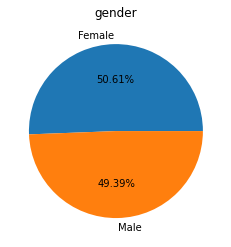

Female    1713
Male      1672
Name: gender, dtype: int64


In [172]:
gender = data['gender'].value_counts()
label = gender.index

plt.pie(gender, labels=label, autopct='%.2f%%')
#plt.legend(loc='upper left')
plt.title('gender')
plt.show()
print(gender)

### Distribution of student

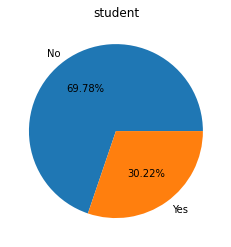

No     2577
Yes    1116
Name: student, dtype: int64


In [173]:
student = data['student'].value_counts()
label = student.index

plt.pie(student, labels=label, autopct='%.2f%%')
#plt.legend(loc='upper left')
plt.title('student')
plt.show()
print(student)

### Distribution of employment

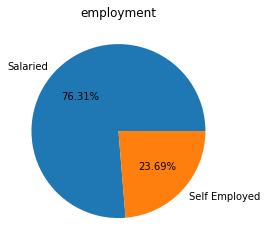

No     2577
Yes    1116
Name: student, dtype: int64


In [174]:
employment = data['employment'].value_counts()
label = employment.index

plt.pie(employment, labels=label, autopct='%.2f%%')
#plt.legend(loc='upper left')
plt.title('employment')
plt.show()
print(student)

### Heatmap

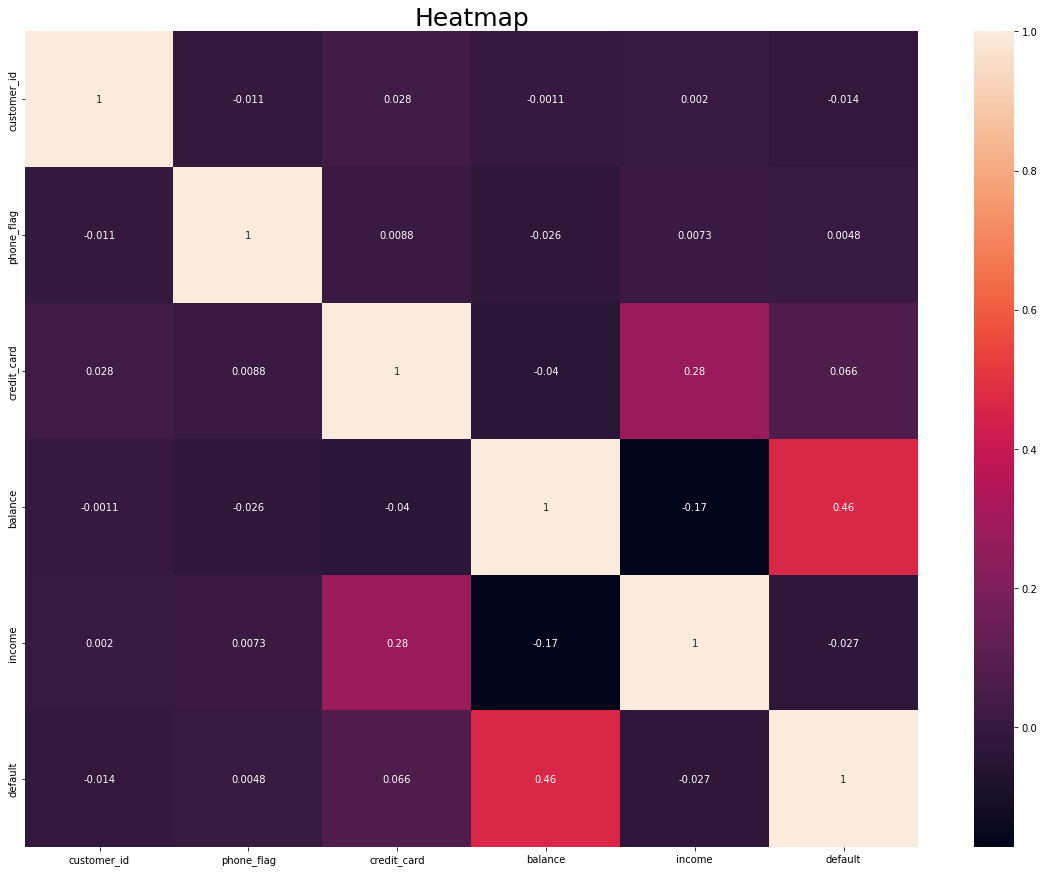

In [175]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, )
plt.title("Heatmap", fontsize = 25);
plt.show()

# Data Preprocesing

## Feature Engineering

### Change DOB to Age by Days

In [176]:
from datetime import datetime, date
data['customer_bod'] = pd.to_datetime(data['customer_bod'])

data['age'] = data['customer_bod'].apply(lambda x: 2021-x.year)

In [177]:
data.drop('customer_bod', axis = 1, inplace= True)

In [178]:
data.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default,age
0,8300,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0,28
1,672,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0,14
2,5670,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0,21
3,2975,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0,22
4,3883,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0,44


### Change Tenure to Numerical Value

In [179]:
def extract_month(given_tenure):
  """
  input : get each tenure from series
  output : monthly value
  example :
    - input : 4yrs 4 mon
    - output : 4(12) + 4 = 52
  """
  year, month = 12, 0
  year += int(given_tenure.split()[0].replace('yrs', ''))
  month += int(given_tenure.split()[1].replace('mon', ''))
  # result
  return year+month

In [180]:
# create monthly from tenure feature
data['monthly tenure'] = data['tenure'].apply(lambda x: extract_month(x))
# remove tenure feature
data = data.drop('tenure', axis = 1)
# check
data.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,default,age,monthly tenure
0,8300,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,0,28,20
1,672,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,0,14,17
2,5670,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0,21,21
3,2975,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,0,22,21
4,3883,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0,44,22


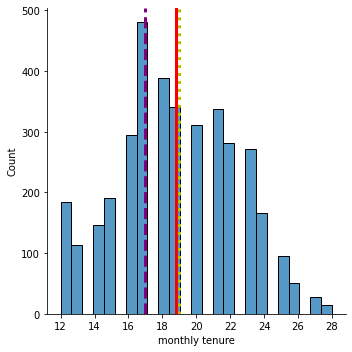

Average :  18.821554291903603
Standard deviation :  3.536966379491657
Median :  19.0
Mode :  17


In [181]:
# distribution of target variable 'monthly tenure'
sns.displot(data=data, x='monthly tenure')

average = data['monthly tenure'].mean()
median = data['monthly tenure'].median()
mode = data['monthly tenure'].mode()
std = data['monthly tenure'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

## Drop Duplicates

In [182]:
data.drop_duplicates() # Tidak ada data duplicate

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,default,age,monthly tenure
0,8300,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,0,28,20
1,672,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,0,14,17
2,5670,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0,21,21
3,2975,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,0,22,21
4,3883,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0,44,22
...,...,...,...,...,...,...,...,...,...,...,...
3688,5661,NaN,0.0,No,Salaried,0.0,144844.88,5060638.68,0,20,21
3689,219,Female,1.0,Yes,Self Employed,0.0,192978.31,2682965.60,0,17,19
3690,7289,Male,1.0,Yes,NaN,0.0,141840.01,2172340.05,0,19,13
3691,698,Male,1.0,No,Salaried,0.0,69477.43,5556566.10,0,43,25


## Finding Missing Value

In [183]:
# Number of cases with NaN
data.isnull().sum()

customer_id         0
gender            308
phone_flag          0
student             0
employment        992
credit_card        11
balance             0
income              0
default             0
age                 0
monthly tenure      0
dtype: int64

### Data Imputation

#### Gender

In [184]:
# Missing Values (gender)
data_gender = data['gender']
data_gender.isnull().sum()

308

In [185]:
data_gender = data_gender.fillna(data_gender.mode()[0])

In [186]:
data['gender'] = data_gender.values

#### Employment

In [187]:
# Missing Values (employment)
data_employment = data['employment']
data_employment.isnull().sum()

992

In [188]:
data_employment = data_employment.fillna(data_employment.mode()[0])

In [189]:
data['employment'] = data_employment.values

#### Credit Card

In [190]:
# Missing Values (credit_card)
data.loc[data['credit_card'].isnull(), 'credit_card'] = data['credit_card'].median()

## Label Encoder

In [191]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])

In [192]:
data['student'] = label.fit_transform(data['student'])

In [193]:
data['employment'] = label.fit_transform(data['employment'])

In [194]:
data.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,default,age,monthly tenure
0,8300,0,1.0,0,1,1.0,87104.12,5015120.75,0,28,20
1,672,0,1.0,1,0,0.0,89236.34,2266076.58,0,14,17
2,5670,0,1.0,1,0,0.0,171553.12,1779347.34,0,21,21
3,2975,0,1.0,1,0,0.0,85979.04,2014246.24,0,22,21
4,3883,1,1.0,0,0,0.0,48874.77,5445148.31,0,44,22


## Feature Selection

### Numerical Feature

#### Using Anova Testing

In [195]:
X_num = data[['balance', 'income', 'age', 'monthly tenure']]

In [196]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

In [197]:
MIC_anova = SelectKBest(score_func=f_classif, k='all')

In [198]:
MIC_anova.fit(X_num, y)

SelectKBest(k='all')

In [199]:
feature_MI_pvalue = pd.Series(MIC_anova.pvalues_, index = X_num.columns)
feature_MI_pvalue.round(4).sort_values(ascending = False)

income            0.0995
monthly tenure    0.0234
age               0.0000
balance           0.0000
dtype: float64

Berdasarkan **P-value** yang diperoleh dari pengujian ANOVA di atas, maka dapat disimpulkan bahwa semua variabel numerik yang akan digunakan ternyata mempunyai pengaruh yang signifikan terhadap default atau tidaknta credit tersebut.

### Categorical Feature

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [201]:
# data Kategorik
X_cat = data[['gender', 'phone_flag', 'student','employment','credit_card']].astype("category")

In [202]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gender       3693 non-null   category
 1   phone_flag   3693 non-null   category
 2   student      3693 non-null   category
 3   employment   3693 non-null   category
 4   credit_card  3693 non-null   category
dtypes: category(5)
memory usage: 18.6 KB


#### Using Chi-Squred Test

In [203]:
chi_scores = chi2(X_cat, y)
chi_scores

(array([6.04597103e-02, 2.89090033e-02, 7.33603926e+00, 1.43399863e+02,
        1.19378964e+01]),
 array([8.05770819e-01, 8.64989313e-01, 6.75855926e-03, 4.80622021e-33,
        5.50035483e-04]))

In [204]:
nilai_chi = pd.Series(chi_scores[0], index = X_cat.columns)
nilai_chi

gender           0.060460
phone_flag       0.028909
student          7.336039
employment     143.399863
credit_card     11.937896
dtype: float64

In [205]:
p_value = pd.Series(chi_scores[1], index = X_cat.columns)
p_value.round(4)

gender         0.8058
phone_flag     0.8650
student        0.0068
employment     0.0000
credit_card    0.0006
dtype: float64

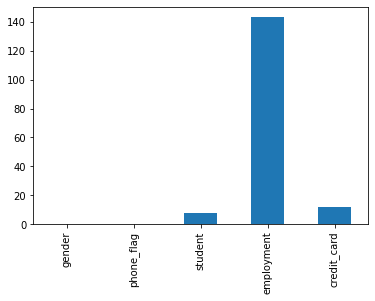

In [206]:
nilai_chi.plot.bar()

Berdasarkan nilai chi-squared serta p-value yang dihasilkan, dapat diambil kesimpulan bahwa dari 7 variabel kategori yang diuji signifikansi terhadap variabel target, diperoleh ternyata berdasarkan uji chi-squared hanya ada 4 variabel yang signifikan berpengaruh terhadap default atau tidaknya credit tersebut.

variabel tersebut di antaranya **student, employement, credit_card**

## Train Test Split

In [207]:
from sklearn.model_selection import train_test_split

X = data.drop(['default', 'customer_id','gender','phone_flag' ], axis=1)
y = data['default']

### Imbalaced

In [208]:
# Handling imbalance df
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

In [209]:
# Fit the over sampling
X, y = oversampling.fit_resample(X, y)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

## Scaling

In [211]:
# scaling
from sklearn.preprocessing import StandardScaler

In [212]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [213]:
X_train.head()

,student,employment,credit_card,balance,income,age,monthly tenure
6278,0,1,0.047671,247493.285512,6.114989e+06,20,21
5081,0,0,0.482535,159525.261651,4.269392e+06,31,18
6677,0,0,1.000000,171180.721710,5.702354e+06,35,22
5482,0,0,0.323893,166422.747180,5.217793e+06,25,20
4456,1,0,0.000000,260265.310855,2.646271e+06,10,23


In [214]:
X_train_scaled.head()

,student,employment,credit_card,balance,income,age,monthly tenure
0,-0.678840,2.067184,-0.636772,1.292292,1.354589,-0.503964,0.673203
1,-0.678840,-0.483750,0.350898,0.083981,0.210303,0.663066,-0.262904
2,-0.678840,-0.483750,1.526175,0.244078,1.098752,1.087440,0.985239
3,-0.678840,-0.483750,-0.009412,0.178724,0.798319,0.026504,0.361167
4,1.473102,-0.483750,-0.745044,1.467726,-0.796048,-1.564900,1.297275


# Classification Model

## Import Library

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [216]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    f1_score = round((2* (precision * recall)/(precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

## KNN

In [217]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [218]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [219]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[2536  224]
 [  54 2686]]
Accuracy   : 94.95 %
Precision  : 92.3 %
Recall     : 98.03 %
F1_Score   : 95 %


In [220]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[609  69]
 [ 21 677]]
Accuracy   : 93.46 %
Precision  : 90.75 %
Recall     : 96.99 %
F1_Score   : 94 %


## Decision Tree

In [221]:
dectree = DecisionTreeClassifier(max_depth=7) # bisa cek pake gini atau pake entropy
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [222]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [223]:
pd.DataFrame(y_test_pred, columns=['is_promoted'])

,is_promoted
0,1
1,1
2,0
3,0
4,1
...,...
1371,1
1372,1
1373,1
1374,0


In [224]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[2575  185]
 [ 103 2637]]
Accuracy   : 94.76 %
Precision  : 93.44 %
Recall     : 96.24 %
F1_Score   : 95 %


In [225]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[620  58]
 [ 40 658]]
Accuracy   : 92.88 %
Precision  : 91.9 %
Recall     : 94.27 %
F1_Score   : 93 %


## Random Forest

In [226]:
ranfor = RandomForestClassifier(max_depth=7)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [227]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [228]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[2569  191]
 [ 101 2639]]
Accuracy   : 94.69 %
Precision  : 93.25 %
Recall     : 96.31 %
F1_Score   : 95 %


In [229]:
classification_eval(y_test, y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[632  46]
 [ 26 672]]
Accuracy   : 94.77 %
Precision  : 93.59 %
Recall     : 96.28 %
F1_Score   : 95 %
